In [1]:
from covid.simulator import Population
from covid.auxilliary import symptom_names
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from covid.policy import Policy
from scipy.stats import bernoulli, beta, uniform

In [7]:
class Thompson_Pol(Policy):
    def __init__(self, n_actions, action_set):
        super().__init__(n_actions, action_set)
        self.a = np.ones(n_actions)
        self.b = np.ones(n_actions)
    
    def observe(self, features, action, outcomes):
        
        #r = X_new[t, 150]
        #alphas[idx,action] += r
        #betas[idx,action] += (1-r)
        
        #observe vaccine and update alpha and beta
        
        #for index, outcome in enumerate(outcomes):
        
        self.a[action] += outcomes
        self.b[action] += 1 - outcomes
        #a = np.ones(n_actions)
        #b = np.ones(n_actions)


        #a[action] += outcome
        #b[action] += 1 - outcome
    
    
    
    
    def get_action(self, features):
        
        #theta_hat = beta(alphas, betas).rvs((sims, nactions))
        theta_hat = beta(self.a, self.b).rvs(n_actions)
        #a = np.ones(n_actions)
        #b = np.ones(n_actions)
        
        
        #theta_hat = beta(a, b).rvs(nactions)
        
        
        actions = np.argmin(theta_hat)#, axis=1)
        
        return actions
    


In [17]:
## Baseline simulator parameters
n_genes = 128
n_vaccines = 3 # DO NOT CHANGE, breaks the simulator.
n_treatments = 4
n_population = 10_000
n_symptoms = 10

# symptom names for easy reference
from covid.auxilliary import symptom_names

population = Population(n_genes, n_vaccines, n_treatments)
X = population.generate(n_population)
n_features = X.shape[1]

In [18]:
#Make neew column for critical symptom
new_col = X[:,[5,7,8]].sum(axis=1)
new_col0 = new_col > 0
new_col01 = new_col0.astype(int)
new_col01 = np.reshape(new_col01,(n_population,-1))
X_new = np.hstack((X,new_col01))



In [19]:
action_space = np.array([-1,0,1,2])
n_actions = action_space.shape[0]



In [25]:
vaccine_policy = Thompson_Pol(n_actions, action_space)      #(n_vaccines, action_space) # make sure to add -1 for 'no vaccine'
Y = np.zeros((n_population, n_symptoms))
A = np.zeros(n_population)

print("With a for loop")
# The simplest way to work is to go through every individual in the population
for t in range(n_population):
    a_t = vaccine_policy.get_action(X_new[t,150])
    # Then you can obtain results for everybody
    print(a_t)
    #y_t = population.vaccinate([t], a_t)
    #y_t = population.vaccinate([t], a_t.reshape((1, 1)))
    y_t = population.treat([t], a_t)#a_t.reshape((1, 1)))
    # Feed the results back in your policy. This allows you to fit the
    # statistical model you have.
    #print(y_t)
    vaccine_policy.observe(X_new[t,150], a_t, y_t[0,7])
    Y[t] = y_t
    A[t] = a_t


Initialising policy with  4 actions
A = { [-1  0  1  2] }
With a for loop
2


IndexError: invalid index to scalar variable.

In [23]:

print("Vaccinate'em all")
# Here you can get an action for everybody in the population
A = vaccine_policy.get_action(X_new)#[:,150])
print(A)
# Then you can obtain results for everybody
Y = population.treatment(list(range(n_population)), A)
# Feed the results back in your policy. 
vaccine_policy.observe(X_new, A, Y[:7])#[:,150])


Vaccinate'em all
3


AttributeError: 'list' object has no attribute 'shape'

In [13]:
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(array([1261.,    0.,    0., 1951.,    0.,    0., 4849.,    0.,    0.,
        1939.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

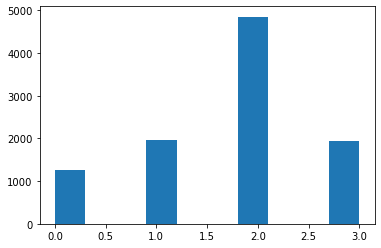

In [12]:
plt.hist(A)

You need to build your own code based on test_policy.py for analysing your policy. 
However, maintain the same method calls:

Policy.get_action()

Policy.observe()

Population.vaccinate()
